# Week-1 Assignment

# **Gotta catch 'em all !**

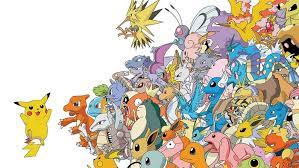

**Welcome to your first graded assignment! Hope that you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about Pokemons.**

**We have got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 2) Read the csv file and assign it to a variable .

In [ ]:
df=pd.read_csv('W1_Pokemon.csv')


### 3) Display shape of dataframe
Expected Output - (800, 13)

In [ ]:
df.shape


(800, 13)

### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [ ]:
columns=df.columns.values
print(columns)


['#' 'Name' 'Type 1' 'Type 2' 'Total' 'HP' 'Attack' 'Defense' 'Sp. Atk'
 'Sp. Def' 'Speed' 'Generation' 'Legendary']


### 5) Remove the column '#' and update the dataframe.

In [ ]:
df=df.drop('#' , axis='columns')


### 6) Set the 'Name' column as the index of dataframe

In [ ]:
df=df.set_index('Name')

###  7) Print a list of all the unique Type-1 powers

In [ ]:
print(df['Type 1'].unique())


['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


### 8) Create a column which contains the Type 1 and Type 2 abilities of pokemons, seperated with a '+'' sign. Also, display the no. of pokemons that have type-1 power as 'Psychic' and type 2 power as 'Flying' using this new column.

In [ ]:
df['new-col']=df['Type 1'] + '+' + df['Type 2']
new_df=df[df['new-col']=='Psychic+Flying']  # A dataframe that contains pokemons with type-1 power as 'Psychic' and type 2 power as 'Flying'

# Display no. of such pokemons

new_df.shape[0]

6

## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. How many pokemons have 'Mega' in their name?

In [ ]:
count=0

for name in df.index:
  if 'Mega' in name:
    # print(name)
    count+=1
print('Number of pokemons with Mega in their name' , count)


# We are accessing name using df.index because we have set Name column as index

Number of pokemons with Mega in their name 49


### 2. What is the standard deviation of Sp. Def. in the dataset ?

In [ ]:
df['Sp. Def'].std()


27.82891579711746

### 3. What percentage (upto 3 decimal places) of pokemons are legendary ?

In [ ]:
legendary_pokemon=df[df.Legendary==True].shape[0]

# df.shape gives a tuple with two values , first representing number of rows or total number of entries
# whereas other represents total number of columns so we are accessing first value

total_pokemon=df.shape[0]

legendary_percentage=(legendary_pokemon/total_pokemon)*100
print(legendary_percentage)


8.125


### 4. Name the pokemon(s) with Maximum Defense.

In [ ]:
max_defense=df['Defense'].max()
new_df=df[df['Defense']==max_defense]
print(new_df.index.values)





['SteelixMega Steelix' 'Shuckle' 'AggronMega Aggron']


### 5. Which poison pokemon has the strongest attack ?

In [ ]:
strongest_attack=df[df['Type 2']=='Poison'].Attack.max()
print(df[df['Attack']==strongest_attack].index.values)

['BeedrillMega Beedrill' 'MewtwoMega Mewtwo Y' 'ScizorMega Scizor'
 'SwampertMega Swampert' 'AbsolMega Absol' 'KyogrePrimal Kyogre' 'Groudon'
 'Rayquaza' 'DeoxysNormal Forme' 'Zekrom' 'AegislashBlade Forme']


### 6. Using seaborn make different types of plots, observe the trend and answer the questions given in the form.

Text(0.5, 1.0, 'Sp. Atk vs Sp. Def')

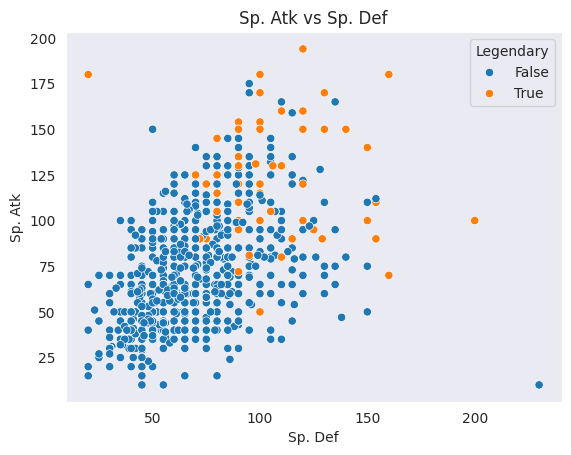

In [ ]:
# We will now plot a scatter plot to visualize the relationship between
# Sp. Atk and Sp. Def for legendary and non legendary pokemons

sns.set_style('dark')
sns.scatterplot(data=df , x='Sp. Def' , y='Sp. Atk' , hue='Legendary')
plt.title("Sp. Atk vs Sp. Def")

1.This clearly shows there are far more non-legendary pokemons than legendary pokemons in the given dataset

2.Legendary pokemons have higher Sp. Def and Sp. Atk as compared to non-legendary pokemons


Text(0.5, 1.0, 'Total vs Attack/Defense')

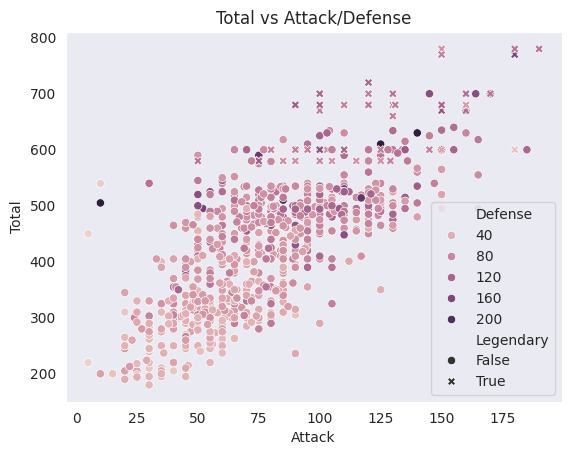

In [ ]:
sns.set_style('dark')
sns.scatterplot(data=df , x='Attack' , y='Total' , hue='Defense' , style='Legendary' )
plt.title('Total vs Attack/Defense')

1.Clearly pokemons with higher Attack and higher Defense have a high total Score.

2.Moreover Legendary pokemons are really powerful in terms of attack and defense

Text(0.5, 1.0, 'Speed vs Type of Pokemon')

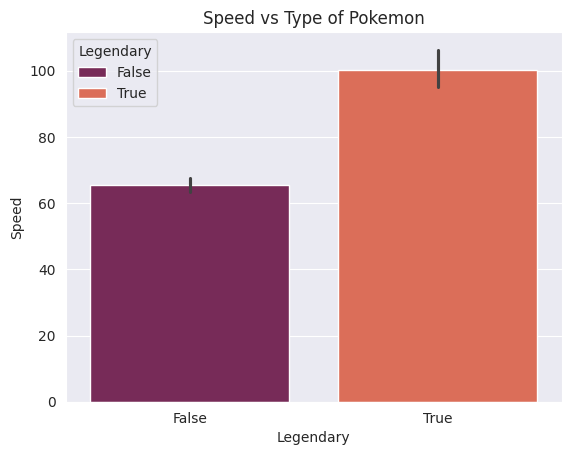

In [ ]:
sns.set_style('darkgrid')
sns.barplot(x='Legendary' , y='Speed', data=df , palette='rocket' , hue='Legendary')

plt.title('Speed vs Type of Pokemon')

1.This clearly illustrates that legendary pokemons have higher speed than non legendary ones

### 7. Which is the second fastest non-legendary 'Ghost' type pokemon from 4th generation ?

In [ ]:
new_df=df[((df['Type 1']=='Ghost' ) & (df['Legendary']==False))  & (df['Generation']==4)]
# We filter out all the entries that satisfy above conditions
print(new_df.Speed.sort_values(ascending=False).index[1])
# new_df.Speed - gives the speed of all pokemons in the new dataframe

# new_df.Speed.sort_values(ascending=False) - sorts the values of speeds along with index in descending order
# new_df.Speed.sort_values(ascending=False).index - This gives us the array containing indexes of sorted values in order

# since index represents name index[1] (second maximum entry) gives name


Drifblim


### 8. How many non-legendary pokemons have stronger defence but weaker attack than Charizard?

In [ ]:
new_df=df[df.Legendary==False]
Charizard_Defense=new_df[new_df.index=='Charizard'].Defense[0]
Charizard_Attack=new_df[new_df.index=='Charizard'].Attack[0]
# print(Charizard_Defense ,Charizard_Attack )

count=0
for index , row in df.iterrows():
  if((row['Attack']<Charizard_Attack) & (row['Defense']>Charizard_Defense)):
    # print(index , row['Defense'] , row['Attack'])
    count+=1
print("Number of pokemons that have stronger defence but weaker attack than Charizard:"  , count)

Number of pokemons that have stronger defence but weaker attack than Charizard: 122



## ***Bonus Questions***
## Here are some bonus questions that you can try further !

### These questions are UNGRADED, and are given as an extra exercise.

### Which pokemon has the highest combined value of Attack and Sp. Atk ?

In [ ]:
# df.dtypes
# Sp. Atk
maxi=0
name=[]
for index, row in df.iterrows():
  val=row['Attack']+row['Sp. Atk']
  # print(index , val)
  if(val>maxi):
    maxi=val


for index, row in df.iterrows():
  val=row['Attack']+row['Sp. Atk']
  if val==maxi:
    name.append(index)


print(name)

['RayquazaMega Rayquaza', 'DeoxysAttack Forme']


### Which type of legendary pokemons are the most common?

In [ ]:
new=df[df.Legendary==True]

# Lets check for type 1 first
print("The type 1 pokemon which is most common is " , new['Type 1'].value_counts(ascending=False).keys()[0])

# Checking for type 2
print("The type 2 pokemon which is most common is " , new['Type 2'].value_counts(ascending=False).keys()[0])


The type 1 pokemon which is most common is  Psychic
The type 2 pokemon which is most common is  Flying


### How many generation-3, non-legendary pokemons have higher HP than the weakest generation-6, legendary pokemon?

In [ ]:
gen3_non_legendary=df[(df.Legendary==False) & (df.Generation==3) ]
gen6_legendary=df[(df.Legendary==True) & (df.Generation==6) ]
weakest_pokemon_hp=gen6_legendary.HP.min()

count=0

for index , row in gen3_non_legendary.iterrows():
  if row['HP']>weakest_pokemon_hp:
    count+=1
print(count)


95


### Print out the third slowest pokemon(s) in the dataset.

In [ ]:
series=(df.Speed.sort_values())
counter=0
name=[]
minimum=series[series.index[0]]
for index in series.index:
  val=series[index]

  if(val>minimum):
    minimum=val
    counter+=1
  if(counter==2):
    name.append(index)
  if(counter==3):
    break
print(name)

['Silcoon', 'Foongus', 'Wooper', 'Slowpoke', 'Cleffa', 'Igglybuff', 'Roggenrola', 'Cascoon', 'Pineco']


### Which pokemon type has the highest average HP?

In [ ]:
print(df.HP.sort_values(ascending=False).index[0])

Blissey
